<a href="https://colab.research.google.com/github/951237/TIL/blob/master/TIL_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIL - 나는 오늘 공부한다

## 기초작업

### 구글드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 라이브러리 호출

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 파일패스 설정 및 연습용 데이터 프레임 생성

In [0]:
filepath = '/content/drive/My Drive/data/insa2019/insa_2019_copy.csv'

In [20]:
df = pd.read_csv(filepath)
df.head()

,구분,시군,학교명,성명,나이,성별,근무성적,전보총점,우선우대사항,발령지,1희망,2희망,3희망,4희망
0,특만기,의정부,회룡초,홍길동1,43,여,99.50,112.00,13조2항,동두천양주,동두천양주,구리남양주,고양,포천
1,특만기,의정부,새말초,홍길동2,43,여,98.35,110.35,13조2항,동두천양주,동두천양주,포천,연천,구리남양주
2,특만기,의정부,민락초,홍길동3,50,여,98.36,109.86,13조2항,동두천양주,동두천양주,고양,포천,구리남양주
3,특만기,의정부,의정부용현초,홍길동4,44,남,98.76,109.26,13조2항,동두천양주,동두천양주,구리남양주,포천,고양
4,특만기,의정부,배영초,홍길동5,49,여,99.38,107.38,13조2항,동두천양주,동두천양주,포천,구리남양주,고양


### 글꼴 설치

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

### 글꼴 설정

In [0]:
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname = fontpath, size = 9)

fm._rebuild()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
fm._rebuild()

## 오늘의 TIL

### 191230
- 피벗 테이블
- 그래프 그리기

#### 피벗 - 시군별로

In [7]:
df_pivot = df.pivot(columns='시군', values='나이')
df_pivot

시군,가평,고양,광명,광주하남,구리남양주,군포의왕,김포,동두천양주,부천,성남,수원,시흥,안산,안성,안양과천,양평,여주,연천,용인,의정부,이천,파주,평택,포천,화성오산
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN
3190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 히스토 그램 그리기

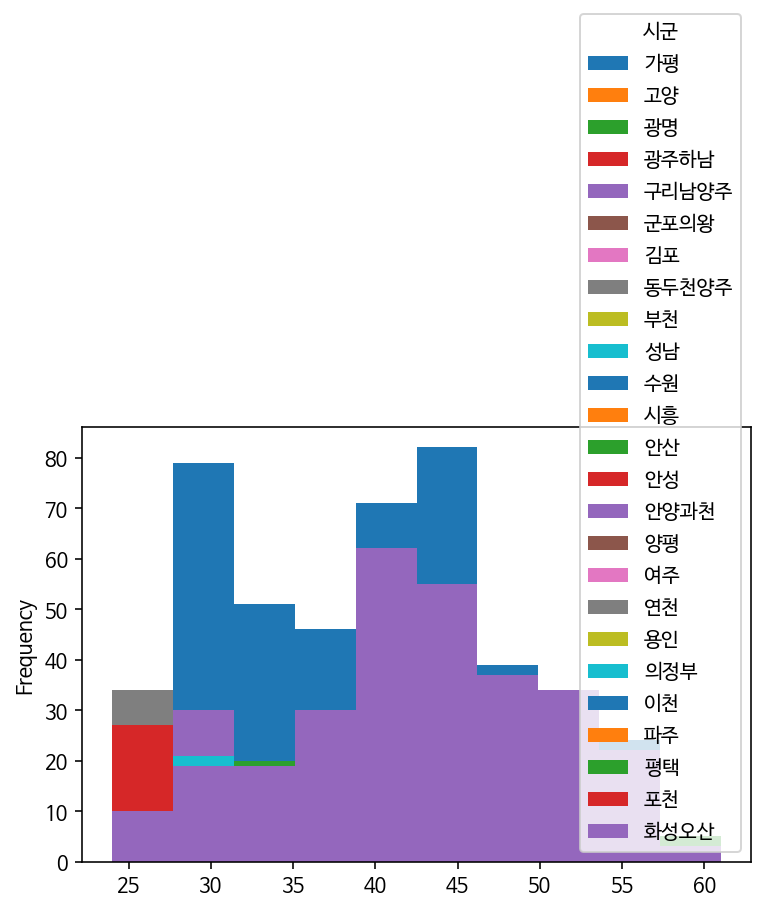

In [8]:
df_pivot.plot.hist()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 14 columns):
구분        3194 non-null object
시군        3194 non-null object
학교명       3194 non-null object
성명        3194 non-null object
나이        3194 non-null int64
성별        3194 non-null object
근무성적      3194 non-null float64
전보총점      3194 non-null float64
우선우대사항    3194 non-null object
발령지       3194 non-null object
1희망       690 non-null object
2희망       690 non-null object
3희망       690 non-null object
4희망       690 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 349.5+ KB


### Groupby

#### 그룹짓기 - 시군 / 성별

In [0]:
df_groupby = df.groupby([df['시군'], df['성별']])

#### 그룹의 내용 카운트

In [43]:
df_groupby = df_groupby.count()
df_groupby

구분  학교명   성명   나이  근무성적  전보총점  우선우대사항  발령지  1희망  2희망  3희망  4희망
시군    성별                                                                 
가평    남     5    5    5    5     5     5       5    5    0    0    0    0
      여    21   21   21   21    21    21      21   21    0    0    0    0
고양    남    14   14   14   14    14    14      14   14    0    0    0    0
      여    58   58   58   58    58    58      58   58    0    0    0    0
광명    남    10   10   10   10    10    10      10   10    0    0    0    0
      여    68   68   68   68    68    68      68   68    0    0    0    0
광주하남  남    15   15   15   15    15    15      15   15    0    0    0    0
      여    45   45   45   45    45    45      45   45    0    0    0    0
구리남양주 남    12   12   12   12    12    12      12   12    0    0    0    0
      여    54   54   54   54    54    54      54   54    0    0    0    0
군포의왕  남    10   10   10   10    10    10      10   10    0    0    0    0
      여   102  102  102  102   102   102     102  102    0    0    0    0
김포    남    17   17   17   17    17    17      17   17    0    0    0    0
      여    62   62   62   62    62    62      62   62    0    0    0    0
동두천양주 남    39   39   39   39    39    39      39   39    0    0    0    0
      여   133  133  133  133   133   133     133  133    0    0    0    0
부천    남    39   39   39   39    39    39      39   39   25   25   25   25
      여   208  208  208  208   208   208     208  208  133  133  133  133
성남    남    26   26   26   26    26    26      26   26    5    5    5    5
      여   207  207  207  207   207   207     207  207  141  141  141  141
수원    남    50   50   50   50    50    50      50   50   24   24   24   24
      여   386  386  386  386   386   386     386  386  225  225  225  225
시흥    남    16   16   16   16    16    16      16   16    0    0    0    0
      여    90   90   90   90    90    90      90   90    0    0    0    0
안산    남     9    9    9    9     9     9       9    9    0    0    0    0
      여   158  158  158  158   158   158     158  158    0    0    0    0
안성    남    18   18   18   18    18    18      18   18    0    0    0    0
      여    41   41   41   41    41    41      41   41    0    0    0    0
안양과천  남    19   19   19   19    19    19      19   19    4    4    4    4
      여   163  163  163  163   163   163     163  163   76   76   76   76
양평    남     5    5    5    5     5     5       5    5    0    0    0    0
      여    25   25   25   25    25    25      25   25    0    0    0    0
여주    남    16   16   16   16    16    16      16   16    0    0    0    0
      여    40   40   40   40    40    40      40   40    0    0    0    0
연천    남     6    6    6    6     6     6       6    6    0    0    0    0
      여    16   16   16   16    16    16      16   16    0    0    0    0
용인    남    13   13   13   13    13    13      13   13    0    0    0    0
      여    88   88   88   88    88    88      88   88    0    0    0    0
의정부   남    28   28   28   28    28    28      28   28    6    6    6    6
      여   107  107  107  107   107   107     107  107   51   51   51   51
이천    남    24   24   24   24    24    24      24   24    0    0    0    0
      여    93   93   93   93    93    93      93   93    0    0    0    0
파주    남    39   39   39   39    39    39      39   39    0    0    0    0
      여    99   99   99   99    99    99      99   99    0    0    0    0
평택    남    24   24   24   24    24    24      24   24    0    0    0    0
      여   125  125  125  125   125   125     125  125    0    0    0    0
포천    남    19   19   19   19    19    19      19   19    0    0    0    0
      여    41   41   41   41    41    41      41   41    0    0    0    0
화성오산  남    42   42   42   42    42    42      42   42    0    0    0    0
      여   249  249  249  249   249   249     249  249    0    0    0    0

In [45]:
df_groupby = df_groupby.reset_index().set_index('시군')
df_groupby = df_groupby[['성별','구분']]
df_groupby

,성별,구분
시군,,
가평,남,5
가평,여,21
고양,남,14
고양,여,58
광명,남,10
광명,여,68
광주하남,남,15
광주하남,여,45
구리남양주,남,12


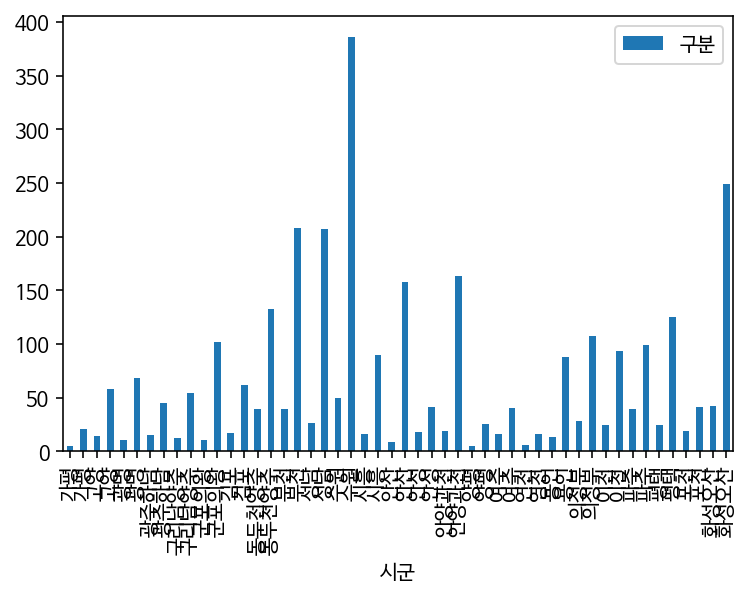

In [47]:
df_groupby.plot.bar(stacked=True)